In [13]:
from pathlib import Path

import cv2

import numpy as np

from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = [15, 10]

# import io
import cProfile as pf
# import pstats
from pstats import SortKey

In [14]:
def read_image(image_path, plot=False):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if plot:
        plt.imshow(img)
        plt.show()
    return img

def show_compare(images: list, image_names: list = []):
    count = len(images)
    count_names = len(image_names)
    fig, axes = plt.subplots(1, count)
    for cnt in range(count):
        axes[cnt].imshow(images[cnt])
        axes[cnt].axis('off')
        if cnt < count_names:
            axes[cnt].set_title(image_names[cnt])
    plt.show()

In [15]:
def white_patch(image, percentile: float = 100):
    # Define white patch and the coefficients
    white = np.percentile(image, percentile, axis=(0, 1))

    # # Apply white balancing and generate balanced image
    # # White patching does not guarantee that the dynamic range is preserved, images must be clipped.
    balanced = (image * 1.0 / white).clip(0, 1)
    # print("Image W")
    # print(balanced)

    return balanced


def gray_world(image):
    # Compute the mean values for all three colour channels (red, green, blue)
    # # Compute the coefficients kr, kg, kb
    # # Note: there are 3 coefficients to compute but we only have 2 equations.
    # # Therefore, you have to make an assumption, fix the value of one of the
    # # coefficients and compute the remining two
    # # Hint: You can fix the coefficient of the brightest colour channel to 1.
    # # Apply color balancing and generate the balanced image
    mean = image.mean(axis=(0, 1))
    balanced = (image * image.mean() / mean).clip(0, 255).astype(int)
    # print("Image G")
    # print(balanced)

    # Show the original and the balanced image side by side
    return balanced


def scale_by_max(image):
    # Compute the maximum values for all three colour channels (red, green, blue)
    balanced = ((image * 1.0 / image.max(axis=(0, 1))).clip(0, 1))

    # # Apply scale-by-max balancing and generate the balanced image
    # print("Image S")
    # print(balanced)
    return balanced


In [16]:
data_dir = Path("../data")
image_paths = data_dir.iterdir()
plt.rcParams['figure.figsize'] = [15, 10]

..\data\1344829.png
..\data\1349488.jpeg
..\data\1350497.png
..\data\1351987.jpeg
..\data\1354206.jpeg
..\data\43600825d9abb54db2aeeadadecf463b.jpg
..\data\987919.jpg
..\data\dark.png
..\data\kodim01.png
..\data\kodim05.jpg
..\data\kodim07.png
..\data\kodim21.png
..\data\nikita-pishchugin-KDQ1BH-I3q4-unsplash.jpg
..\data\sea.jpg
..\data\tire.png
..\data\vivek-7NgbMrUB60A-unsplash.jpg


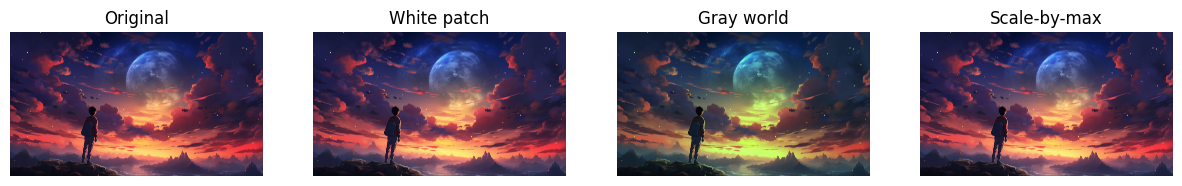

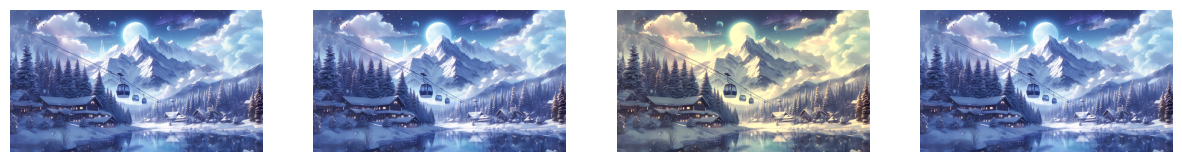

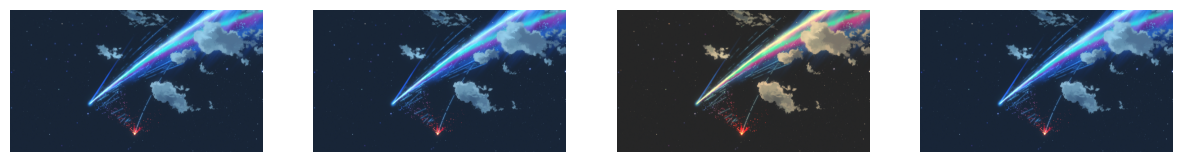

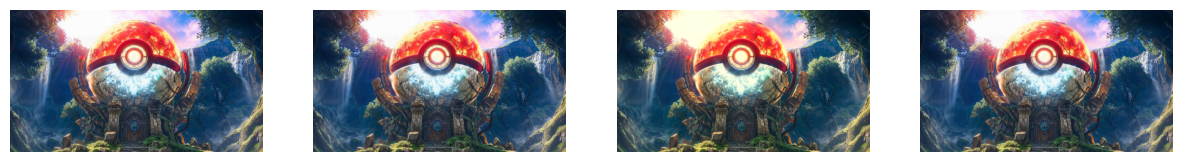

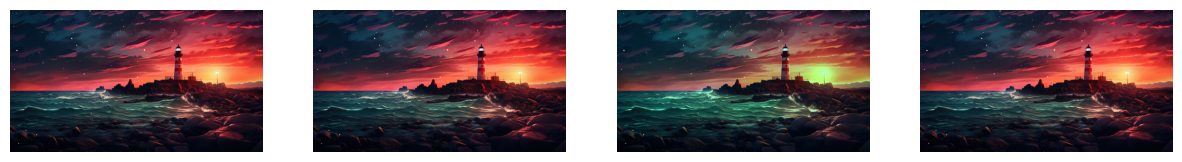

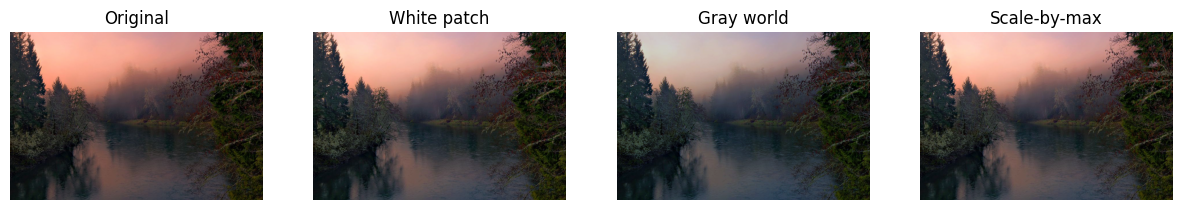

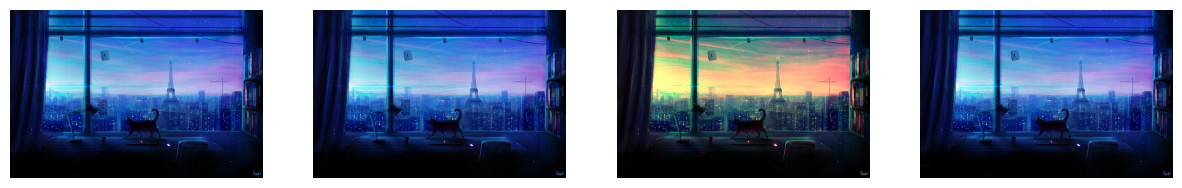

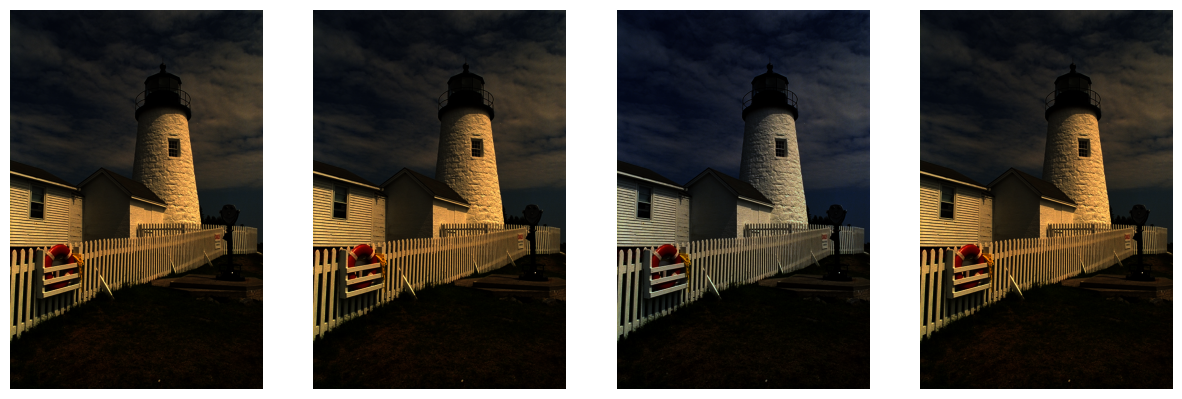

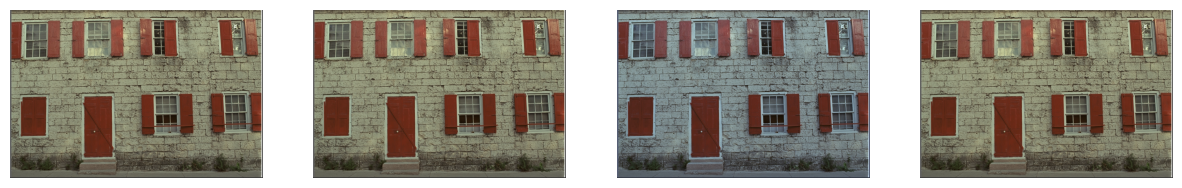

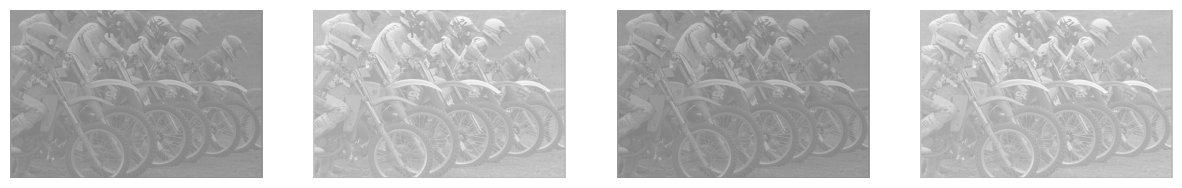

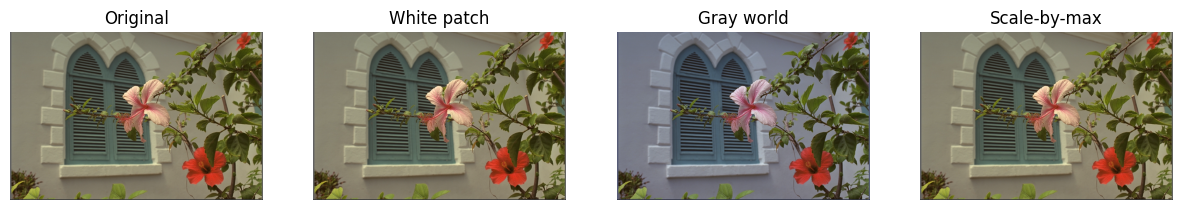

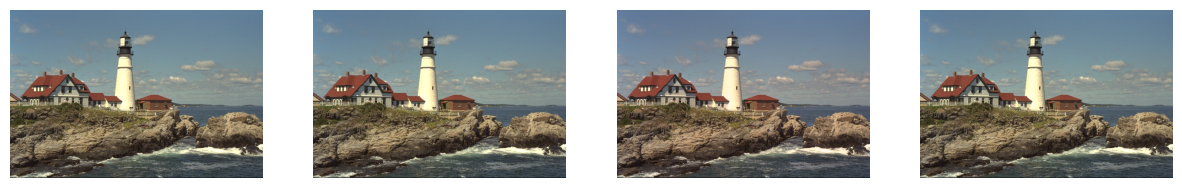

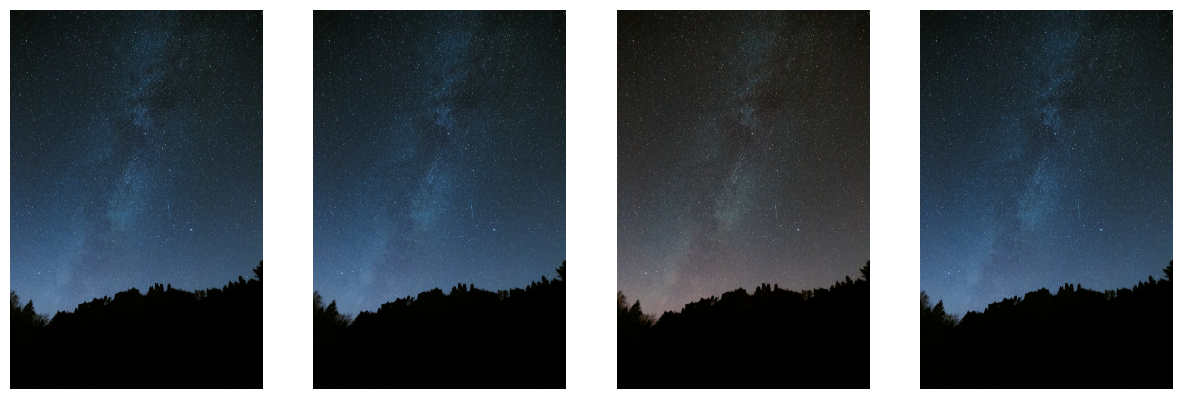

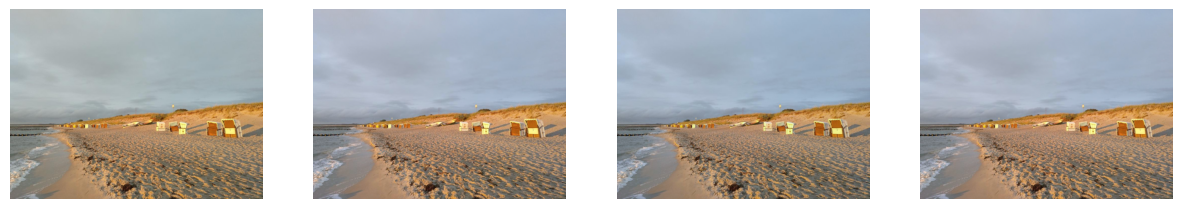

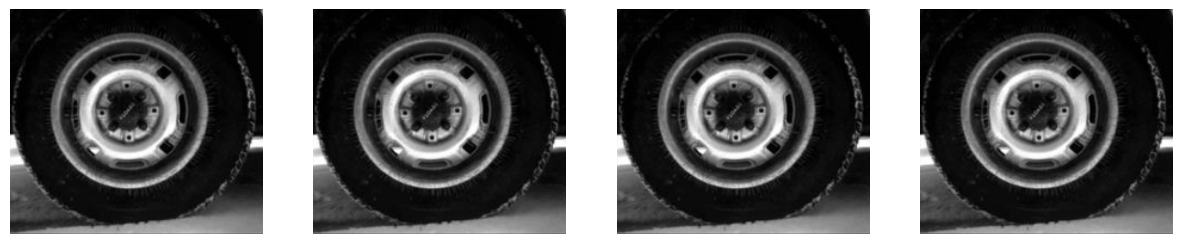

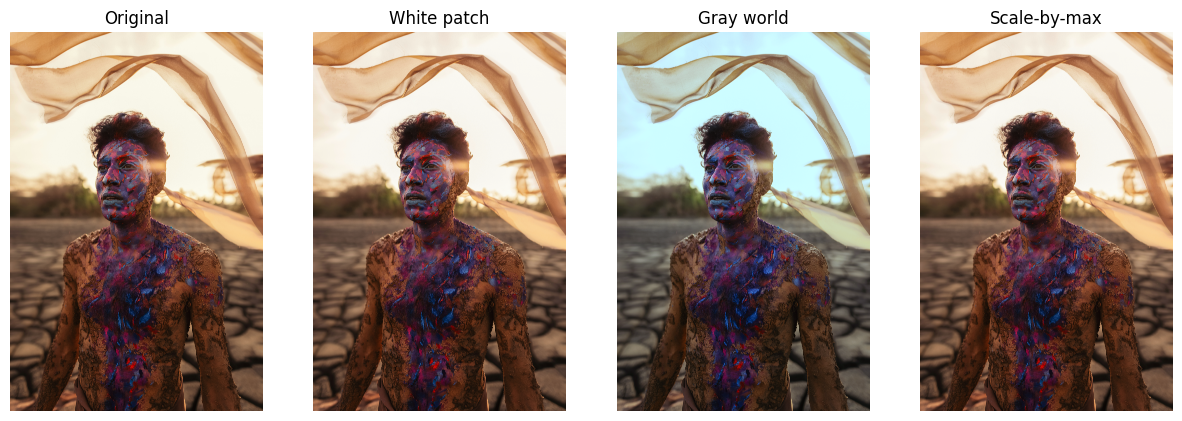

         2116517 function calls (2056579 primitive calls) in 55.372 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      128    9.912    0.077    9.942    0.078 image.py:219(_rgb_to_rgba)
      128    9.133    0.071   18.214    0.142 image.py:585(draw)
      128    7.254    0.057    7.260    0.057 {built-in method matplotlib._image.resample}
    12648    5.853    0.000    5.853    0.000 {method 'reduce' of 'numpy.ufunc' objects}
       16    2.712    0.170    5.468    0.342 1191510411.py:31(scale_by_max)
       16    2.712    0.170    5.450    0.341 1191510411.py:1(white_patch)
       16    2.189    0.137    4.908    0.307 1191510411.py:14(gray_world)
      336    2.024    0.006    2.025    0.006 _methods.py:99(_clip)
     4632    1.926    0.000    1.926    0.000 {built-in method numpy.array}
       16    1.399    0.087    1.399    0.087 {imread}
      116    1.219    0.011    1.906    0.016 {built-in method select.select}

In [17]:
def main():
    images = []
    names = ["Original", "White patch", "Gray world", "Scale-by-max"]

    for image_path in image_paths:
        print(image_path)
        image = read_image(image_path)
        # print("Image")
        # print(image)

        image_w = white_patch(image, 100)
        image_g = gray_world(image)
        image_s = scale_by_max(image)

        images.append([image, image_w, image_g, image_s])

        # break

    show_compare(images[0], names)
    for images_count in range(1, len(images)):
        if images_count % 5 == 0:
            show_compare(images[images_count], names)
        else:
            show_compare(images[images_count])

with pf.Profile() as pr:
    main()
    pr.print_stats(SortKey.TIME)